# Predicting heart disease using machine learning 

Description: This notebook is developed using various python-based machine learning and data science tools to build a machine learning model that predicts whether a person has heart disease based on their medical attributes.

### Tools/Libraries required
Pandas, Matplotlib, Numpy and Scikit Learn

### Procedure followed/Approach:
1. Problem definition
2. Data Collection
3. Data processing
4. Data Exploration (EDA-Exploratory Data Analysis)
5. Model Training
6. Model Evaluation

## Problem Definition

Given the medical records of a patient, can we predict whether or not they have heart disease. Since we are determining whether the patient fits into a particular class that is heart disease or not, This problem needs classification approach.

## Data Collection

The dataset "heart-disease.csv" is obtained from the Kaggle platform. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### Data Dictionary
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - thalium stress result
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [ ]:
# To install libraries
!pip install pandas

In [1]:
# Import all the required tools

# EDA (Exploratory Data Analysis) and plotting libraries (Data Processing)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model from Scikit-Learn for classification (Model training)
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")

#No. of rows and columns
df.shape

(303, 14)

## Data Processing

### Handling Mising Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        300 non-null    float64
 3   trestbps  296 non-null    float64
 4   chol      291 non-null    float64
 5   fbs       301 non-null    float64
 6   restecg   295 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     301 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     299 non-null    float64
 11  ca        300 non-null    float64
 12  thal      302 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age          0
sex          0
cp           3
trestbps     7
chol        12
fbs          2
restecg      8
thalach     10
exang        2
oldpeak      9
slope        4
ca           3
thal         1
target       0
dtype: int64

In [5]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1
5,57,1,0.0,140.0,192.0,0.0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1
6,56,0,1.0,140.0,294.0,0.0,0.0,153.0,0.0,1.3,1.0,0.0,2.0,1
7,44,1,1.0,120.0,263.0,0.0,1.0,173.0,0.0,0.0,2.0,0.0,3.0,1
8,52,1,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,2.0,0.0,3.0,1
9,57,1,NaN,150.0,168.0,0.0,1.0,174.0,0.0,1.6,2.0,0.0,2.0,1


In [6]:
#imputing missing values for "chol" and "thalach"
df["chol"].describe()

count    291.000000
mean     247.123711
std       52.043998
min      126.000000
25%      211.500000
50%      242.000000
75%      275.500000
max      564.000000
Name: chol, dtype: float64

In [7]:
df["thalach"].describe()

count    293.000000
mean     149.525597
std       22.964912
min       71.000000
25%      133.000000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [8]:
chol_mean=int(df["chol"].mean())
thalach_mean = int(df["thalach"].mean())

# filling the missing values with mean values of its respective column
df["chol"]=df["chol"].fillna(chol_mean)
df["thalach"]=df["thalach"].fillna(thalach_mean)

In [9]:
df.isna().sum()

age         0
sex         0
cp          3
trestbps    7
chol        0
fbs         2
restecg     8
thalach     0
exang       2
oldpeak     9
slope       4
ca          3
thal        1
target      0
dtype: int64

In [10]:
# We can also get rid of missing values just by simply dropping them off the dataframe
df=df.dropna(axis = 0, how='any')

In [11]:
# Re-checking whether there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since all the data columns are numerical values, we can proceed to next stage to gain better insights about the data

## Data Exploration (EDA)

The dataset must be explored to know about the following:
1. The Kind or different types of data we are dealing with
2. Are there any missing data?
3. Does data contain outliers? 
4. Determine the necessary features to improve the prediction accuracy.

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [13]:
# "Target" contains the information whether a patient has heart disease or not (classes)
# How many in the dataset does each class contains
df["target"].value_counts()

0    138
1    136
Name: target, dtype: int64

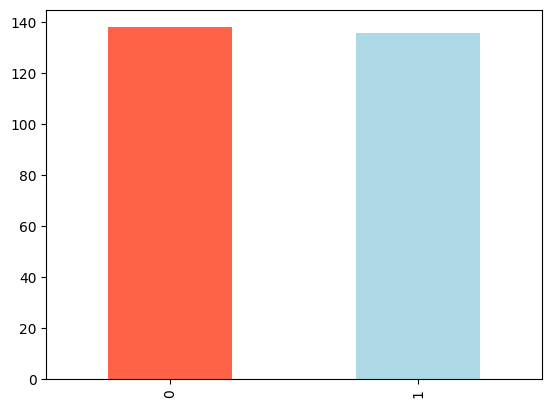

In [14]:
df["target"].value_counts().plot(kind="bar",color=["tomato","lightblue"]);

Inference: From the above graph, we say that the classes are balanced almost equally

### Target value Depending on Sex (Relation between gender and heart disease)

In [15]:
df.sex.value_counts()

1    185
0     89
Name: sex, dtype: int64

In [16]:
# comparing target and sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,65,71


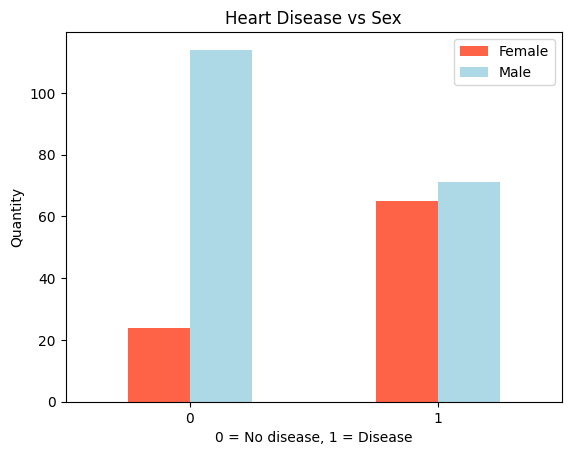

In [17]:
# Creating a plot for crosstab for better understanding
pd.crosstab(df.target,df.sex).plot(kind="bar", color=["tomato","lightblue"]);

# Adding attributes to the plot to make it more readable
plt.title("Heart Disease vs Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Quantity")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Inference: From the above graph, female are mostly likely to be affected by a heart disease. So its safe to say that the target value can depend on sex attribute

### Age va. Max Heart Rate for heart disease

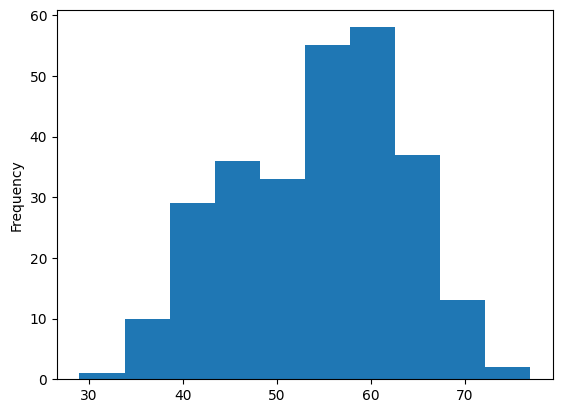

In [18]:
# check age distribution in the dataset
df.age.plot.hist();

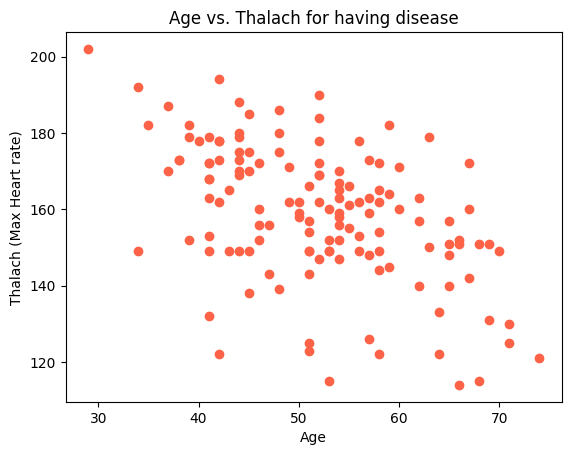

In [19]:
# Plot the age and heart rate of people who have disease
# df["age"] or df.age both refers the same

plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c="tomato");

plt.title("Age vs. Thalach for having disease")
plt.xlabel("Age")
plt.ylabel("Thalach (Max Heart rate)");


Inference: The two graph depicts that people of age ranging from 55 - 65 years old have a high heart beating rate

### Chest Pain vs Heart Disease

cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0.0,104,27
1.0,9,37
2.0,18,58
3.0,7,14


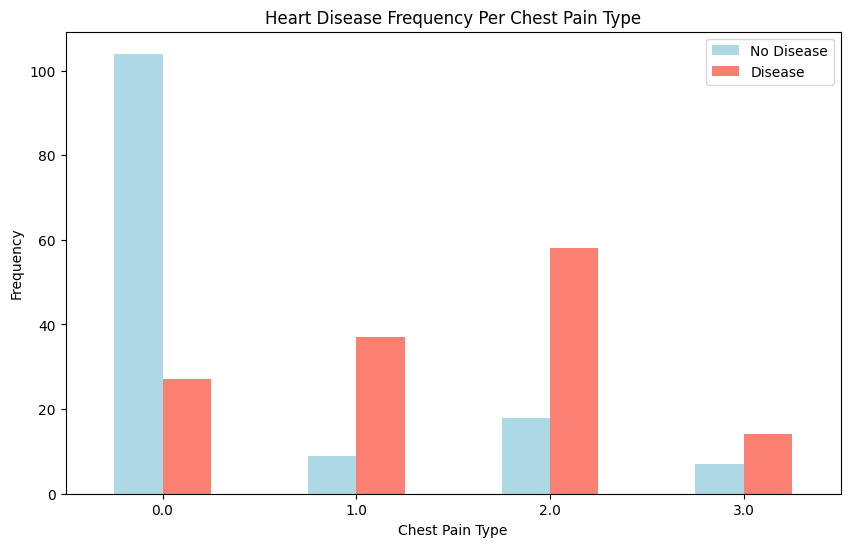

In [21]:
# Create crosstab plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])


plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

Inference: Even though Chest pain type 2 is not related to heart disease, Most of it is termed as disease class. 

## Model Training

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1
1,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1
2,41,0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1
3,56,1,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1
4,57,0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1


In [23]:
# Split data into X and y
X = df.drop("target",axis=1)
X.shape

(274, 13)

In [24]:
y = df.target

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 274, dtype: int64

In [26]:
# spliting data into train and test
np.random.seed(42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X_train.shape, X_test.shape

((219, 13), (55, 13))

#### The suitable model for this problem statement is chosen after experimenting with other models with the help of Scikit Learn Machine learning Map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [28]:
# define a classifier
model = RandomForestClassifier()
np.random.seed(42)

# Fit the model to the data
model.fit(X_train, y_train)

# Evaluate the model score4
model_score = model.score(X_test, y_test)

model_score

0.8909090909090909

## Model Evaluation

In [29]:
y_preds = model.predict(X_test)
y_preds

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

Lets compare the predicted test labels with actual test lables

In [30]:
compare = pd.DataFrame([y_preds,y_test])
compare

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


### Classification Report

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.87      0.93      0.90        28

    accuracy                           0.89        55
   macro avg       0.89      0.89      0.89        55
weighted avg       0.89      0.89      0.89        55



### Confusion Matrix

In [32]:
confusion_matrix(y_test,y_preds)

array([[23,  4],
       [ 2, 26]], dtype=int64)

### Model Tuning

There are many methods to improve a model's accuracy models. One of such methods for finding the best performance by a Random Forest Classifier is to scale the n_estimators.

In [33]:
for i in range(10,100,10):
    print(f"Trying different n_estimators {i}")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model Accuracy = {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Trying different n_estimators 10
Model Accuracy = 78.18%

Trying different n_estimators 20
Model Accuracy = 85.45%

Trying different n_estimators 30
Model Accuracy = 85.45%

Trying different n_estimators 40
Model Accuracy = 83.64%

Trying different n_estimators 50
Model Accuracy = 83.64%

Trying different n_estimators 60
Model Accuracy = 89.09%

Trying different n_estimators 70
Model Accuracy = 87.27%

Trying different n_estimators 80
Model Accuracy = 83.64%

Trying different n_estimators 90
Model Accuracy = 83.64%



Using the inference from above result, we can improve our model's performance


In [42]:
import pickle
pickle.dump(model,open('heart-disease.pkl','wb'))
model=pickle.load(open('heart-disease.pkl','rb'))

#### Furthermore, this model can be exported using the "pickle" library in python and load it to a python flask webapp to provide an end-user experience.

Note: This notebook was developed by Keerthana S as a part of DevTown internship task.

### Thank You
